In [ ]:
%matplotlib inline
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# New Section

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext google.colab.data_table
data = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021 perso/Data.json")
print(len(data))
data.head(2)

12261


,art_id,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag
0,0,,None,7 décembre 2018,fr,4ème Conférence Nationale de l’Emploi Territor...,http://fncdg.com/4eme-conference-nationale-de-...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2018/12/ra...,None,None
1,1,La FNCDG et l’ANDCDG ont publié en septembre l...,"<p style=""text-align: justify;"">La FNCDG et l’...",22 septembre 2020,fr,9ème édition du Panorama de l’emploi territorial,http://fncdg.com/9eme-edition-du-panorama-de-l...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/09/im...,None,None


In [ ]:
dataClean = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/df_final_clean.json")


titles=["vide"]*7533
tags=[[]]*7533
index=0
for i in dataClean['art_id']:
  titles[index]=data.loc[data['art_id']==i]['art_title'].values[0]
  test_list=data.loc[data['art_id']==i]['art_tag'].values[0]
  if test_list==None:
    tags[index]=[]
  elif test_list[0]=='[':
      tags[index]=eval(test_list)
  else:
    if "Not Found"==test_list:
      tags[index]=[]
    else:
      tags[index]=[test_list]
  index=index+1
for i in range(len(tags)):
  if tags[i]==['']:
    tags[i]=[]
  for j in range(len(tags[i])):
    if tags[i][j][0]=='#':
      tags[i][j]=tags[i][j][1:]

%load_ext google.colab.data_table
df_clean = pd.DataFrame({'art_id'	:dataClean['art_id'],
                         'art_content_prepd': dataClean['art_content_prepd'],
                         'art_title':titles,
                         'art_tag':tags})
print(len(df_clean))
df_clean.head(2)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
7533


,art_id,art_content_prepd,art_title,art_tag
1,1,fncdg andcdg publie septembre eme edition pano...,9ème édition du Panorama de l’emploi territorial,[]
2,2,malgre levee mesure confinement mai plupart me...,ACTUALITÉS FNCDG / COVID19,[]


In [ ]:
df_clean.art_tag = df_clean.art_tag.apply(lambda y: np.nan if len(y)==0 else y)
print(len(df_clean))

7533


In [ ]:
%load_ext google.colab.data_table

train_set = df_clean.copy()
train_set.dropna(subset=['art_tag'], inplace=True)
print(len(train_set))
train_set.head(2)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
5256


,art_id,art_content_prepd,art_title,art_tag
74,74,quelle taille heure actuelle mairie toutes bes...,"Villages, petites et moyennes communes : pourq...",[Relations Citoyennes]
75,75,comment savoir si besoin mise jour refonte sit...,5 signes qu’il est temps de procéder à la refo...,[Relations Citoyennes]


In [ ]:
mask = df_clean['art_id'].isin(train_set['art_id'])
test_set = df_clean[~mask]
print(len(test_set))
test_set.head(2)

2277


,art_id,art_content_prepd,art_title,art_tag
1,1,fncdg andcdg publie septembre eme edition pano...,9ème édition du Panorama de l’emploi territorial,NaN
2,2,malgre levee mesure confinement mai plupart me...,ACTUALITÉS FNCDG / COVID19,NaN


In [ ]:
test_set['label'] = ''
ytest = test_set['label']
test_set.drop(columns=['label'])
print(len(ytest))

2277


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def dummy(doc):
    return doc

stopwords_fr = stopwords.words('french')
vectorizer = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy, stop_words=stopwords_fr)

X = vectorizer.fit_transform(train_set['art_tag'])
terms = vectorizer.get_feature_names()
print(vectorizer.vocabulary_)

{'Relations Citoyennes': 498, 'Cloud': 103, 'Horizon Cloud': 293, 'Télétravail': 602, 'Gestion RH': 277, 'Dématérialisation': 172, 'Budget': 71, 'Transformation numérique': 591, 'Sécurité': 573, 'Collaboratif': 105, 'Organisation': 405, 'GRC': 269, 'Relation citoyens': 497, 'communication': 717, 'Smart City': 560, 'Elections': 197, 'Finances': 256, 'Services en ligne': 553, 'Conseil municipal': 123, 'Anti-virus': 41, 'Sauvegarde': 545, 'RGPD': 491, 'Internet': 321, 'Comptabilité': 117, 'Evénement': 240, 'Elus': 202, 'Services techniques': 554, 'Environnement': 223, 'A la une': 10, 'Paie': 419, 'Décisionnel': 168, 'messagerie': 896, 'Accompagnement': 16, 'e-Administration': 775, 'Gestion eau': 279, 'Mutualisation': 383, 'Innover': 311, 'Intercommunalité': 319, 'App mobile': 42, 'Mobilité': 377, 'Aménagement du territoire': 32, 'Acteurs des territoires': 17, 'Action logement': 19, 'Permis de construire': 432, 'Hiérarchie des normes': 292, 'Bâtiment': 75, 'Politique de la ville': 450, 'Co

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'e', 'f', 'i', 'o', 'p', 'q', 'r', 'u', 'v', 'x', 'z', 'é', 'ê', 'û'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


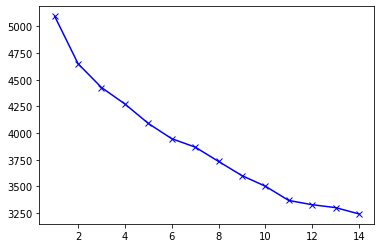

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 12)
ymean = kmeans.fit_predict(X)
print(len(ymean))
ymean

5256


array([ 9,  9,  9, ...,  9,  9, 11], dtype=int32)

In [ ]:
%load_ext google.colab.data_table

df_labeled = pd.DataFrame({'art_id'	:train_set['art_id'],
                         'art_content_prepd': train_set['art_content_prepd'],
                         'art_title':train_set['art_title'],
                         'art_tag':train_set['art_tag'],
                         'labels':ymean})

df_labeled.head(2)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,art_id,art_content_prepd,art_title,art_tag,labels
74,74,quelle taille heure actuelle mairie toutes bes...,"Villages, petites et moyennes communes : pourq...",[Relations Citoyennes],9
75,75,comment savoir si besoin mise jour refonte sit...,5 signes qu’il est temps de procéder à la refo...,[Relations Citoyennes],9


In [ ]:
#calculate the numbers of article by cluster/label
def nb_occu_cluster(lab_df):
  #lab_df: column labels of dataframe -> df_labeled['labels']
  nb=0
  dict_labels={}
  type_labels=[]
  labels=[]

  #create list of labels
  for i in lab_df:
    labels.append(i)
  #create list of labels unique
  type_labels = list(set(labels))
  print(type_labels)

  #parcours la liste (unique) des clusters 
  for i in type_labels:
    if i in labels:
      #compte le nb de d'occurence de ces cluster dans la dataframe(labels)
      nb=labels.count(i)
      dict_labels.update({i:nb})

  print(dict_labels)

nb_occu_cluster(df_labeled['labels'])

In [ ]:
ytrain = df_labeled['labels']
len(ytrain)

5256

In [ ]:
import_bow = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/BOW.csv")

print(len(import_bow))
import_bow.head(4)

12261


,000,01,02,03,04,06,07,08,09,10,100,1000,11,110,118,11h,12,120,13,14,15,150,1500,16,17,18,180,19,1997,1998,1999,1er,20,200,2000,2001,2002,2003,2004,2005,...,étendue,éthique,étions,étranger,étrangers,étrangères,étroite,étroitement,étude,études,étudiant,étudiants,étudier,été,évaluation,évaluer,évalué,éventuellement,éventuelles,évidemment,évidence,évident,éviter,évolue,évoluent,évoluer,évolutif,évolution,évolutions,évolué,évoque,évoquer,évoqué,événement,événements,êtes,être,île,œuvre,art_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
dict_classes = {
            'international': 0,
            'france': 1,
            'economie': 2,
            'numerique': 3,
            'transport': 4,
            'sports': 5,
            'sante': 6,
            'environement': 7,
            'education': 8,
            'securite': 9,
            'entreprise': 10,
            'legislation': 11
            }

In [ ]:
vectorizer = TfidfVectorizer()

vectorizer.fit(train_set['art_content_prepd'])
vocabulary = vectorizer.vocabulary_

xtrain = vectorizer.transform(train_set['art_content_prepd']).toarray()
xtest = vectorizer.transform(test_set['art_content_prepd']).toarray()

ytrain = ytrain.map(dict_classes)
ytest = ytest.map(dict_classes)

In [ ]:
ytrain

74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
         ..
9994    NaN
10000   NaN
10001   NaN
10002   NaN
10003   NaN
Name: labels, Length: 5256, dtype: float64

In [ ]:
#KNN

def model_assessment(model, model_name):
    labels = ['international', 'france', 'economie', 'numerique', 'transport', 
              'sports', 'sante', 'environement', 'education', 'securite', 
              'entreprise', 'legislation']
    clf = model.fit(xtrain, ytrain)
    predicted = clf.predict(xtest)
    print(model_name)
    print(metrics.classification_report (ytest, predicted, target_names=labels))
    print(metrics.confusion_matrix (ytest, predicted))
    print(metrics.accuracy_score (ytest, predicted))


model_assessment(KNeighborsClassifier(n_neighbors=20), 'K Nearest Neighbors')

ValueError: ignored